In [34]:
import numpy as np
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.animation as an

In [186]:
# initialize 

X=[[],[],[]] # obj1, obj2, obj3 
Y=[[],[],[]]
Z=[[],[],[]]
T=[]

coord = np.array([[100.,0,0],[0,100.0,0],[0,0,100.0]]) # three objects, three coordinates [x,y,z] each 
vel = np.array([[0,1.0,0],[0,0,1.0],[-1,0,0]]) # initial velocity
M = [1000,1000,1000]  # mass

dim=3 # dimension of space
dt = 0.1
t=0

In [187]:
def dist(a, b): # distance between two obj: dist(coor[i], coord[j])
    return np.sqrt( sum( (a-b)**2 ) )

for i in range(0,2000):
    r01 = dist(coord[0], coord[1]) # calculating distance between each pair 
    r02 = dist(coord[0], coord[2])
    r12 = dist(coord[1], coord[2])

    a01 = -M[1]*(coord[0] - coord[1])/r01**dim  # acceleration exerted by 1 on 0
    a10 = -M[0]*(coord[1] - coord[0])/r01**dim  # acceleration exerted by 0 on 1
    a02 = -M[2]*(coord[0] - coord[2])/r02**dim
    a20 = -M[0]*(coord[2] - coord[0])/r02**dim
    a12 = -M[2]*(coord[1] - coord[2])/r12**dim
    a21 = -M[1]*(coord[2] - coord[1])/r12**dim

    vel[0] += a01*dt + a02*dt # updating velocity
    vel[1] += a10*dt + a12*dt
    vel[2] += a20*dt + a21*dt

    coord[0] += vel[0]*dt # updating coordinate
    coord[1] += vel[1]*dt
    coord[2] += vel[2]*dt

    t += dt # updating time

    X[0].append(coord[0][0]) # first object
    Y[0].append(coord[0][1])
    Z[0].append(coord[0][2])

    X[1].append(coord[1][0]) # second object
    Y[1].append(coord[1][1])
    Z[1].append(coord[1][2])

    X[2].append(coord[2][0]) # third object
    Y[2].append(coord[2][1]) 
    Z[2].append(coord[2][2])

    T.append(t)

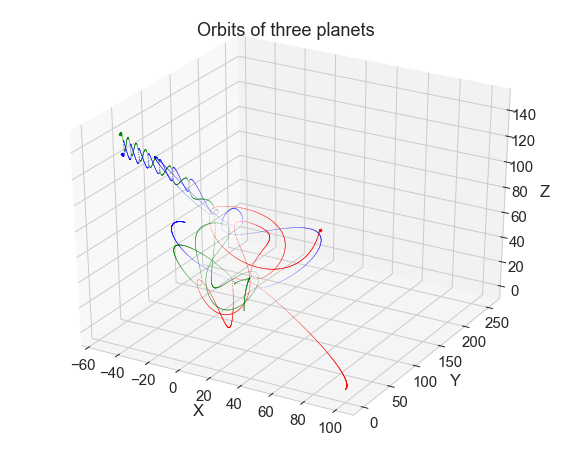

In [188]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
fig = pt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')

# plotting tracks
s1=0.5
ax.scatter(X[0], Y[0], Z[0], marker='.', s=s1, color='red')
ax.scatter(X[1], Y[1], Z[1], marker='.', s=s1, color='green')
ax.scatter(X[2], Y[2], Z[2], marker='.', s=s1, color='blue')

# starting points
# ax.scatter(X[0][0], Y[0][0], Z[0][0], marker='s', s=10, color='red')
# ax.scatter(X[1][0], Y[1][0], Z[1][0], marker='s', s=10, color='green')
# ax.scatter(X[2][0], Y[2][0], Z[2][0], marker='s', s=10, color='blue')

# # ending points
ax.scatter(X[0][-1], Y[0][-1], Z[0][-1], marker='o', s=10, color='red')
ax.scatter(X[1][-1], Y[1][-1], Z[1][-1], marker='o', s=10, color='green')
ax.scatter(X[2][-1], Y[2][-1], Z[2][-1], marker='o', s=10, color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.tick_params(axis='x', pad=1)
ax.tick_params(axis='y', pad=1)
ax.tick_params(axis='z', pad=1)
pt.title('Orbits of three planets')

pt.show()